In [96]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

In [97]:
# 对网络 G 进行可视化
def plot_graph(G):
  fig, ax = plt.subplots(figsize = (12, 8))
  # plt.figure()
  pos = nx.spring_layout(G)
  edges = G.edges()
  # nx.draw_networkx(G, pos, edges = edges)
  nx.draw_networkx_nodes(G, pos, nodelist = G.nodes(), node_size = 300, node_color = 'r', alpha = 0.8)
  nx.draw_networkx_edges(G, pos, edgelist = edges, alpha = 0.4)
  nx.draw_networkx_labels(G, pos, font_size = 10, ax = ax)
  plt.show()

In [98]:
path = '/Volumes/Library/SynologyDrive/data/AI_Cheats/'

In [99]:
# 数据加载，构造图
G = nx.read_gml(path + '/LPA/football.gml')
print(G)
print(type(G))

Graph with 115 nodes and 613 edges
<class 'networkx.classes.graph.Graph'>


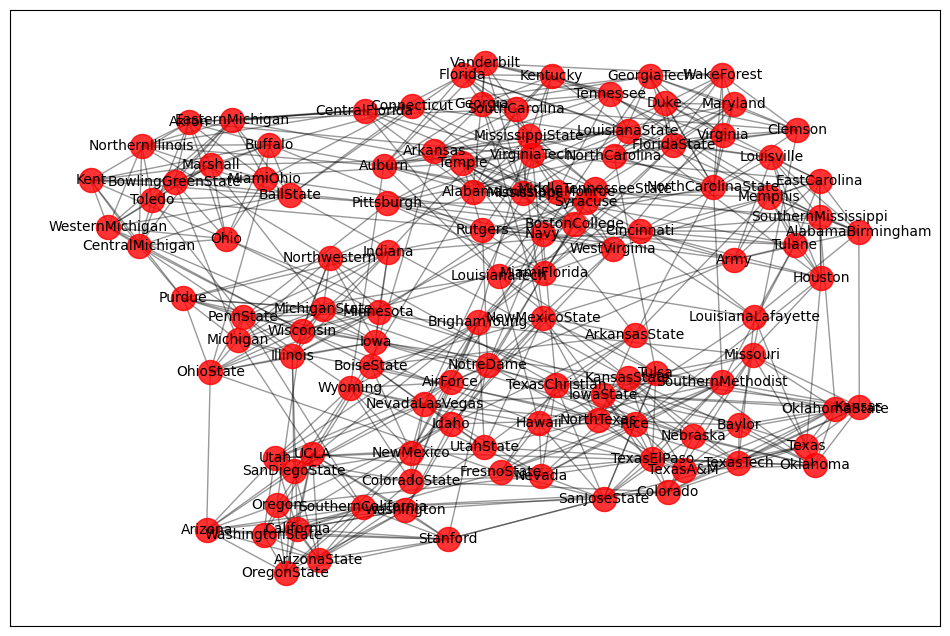

['BrighamYoung', 'FloridaState', 'Iowa', 'KansasState', 'NewMexico', 'TexasTech', 'PennState', 'SouthernCalifornia', 'ArizonaState', 'SanDiegoState', 'Baylor', 'NorthTexas', 'NorthernIllinois', 'Northwestern', 'WesternMichigan', 'Wisconsin', 'Wyoming', 'Auburn', 'Akron', 'VirginiaTech', 'Alabama', 'UCLA', 'Arizona', 'Utah', 'ArkansasState', 'NorthCarolinaState', 'BallState', 'Florida', 'BoiseState', 'BostonCollege', 'WestVirginia', 'BowlingGreenState', 'Michigan', 'Virginia', 'Buffalo', 'Syracuse', 'CentralFlorida', 'GeorgiaTech', 'CentralMichigan', 'Purdue', 'Colorado', 'ColoradoState', 'Connecticut', 'EasternMichigan', 'EastCarolina', 'Duke', 'FresnoState', 'OhioState', 'Houston', 'Rice', 'Idaho', 'Washington', 'Kansas', 'SouthernMethodist', 'Kent', 'Pittsburgh', 'Kentucky', 'Louisville', 'LouisianaTech', 'LouisianaMonroe', 'Minnesota', 'MiamiOhio', 'Vanderbilt', 'MiddleTennesseeState', 'Illinois', 'MississippiState', 'Memphis', 'Nevada', 'Oregon', 'NewMexicoState', 'SouthCarolina', 

In [100]:
# 可视化
plot_graph(G)
print(list(G.nodes()))
print(G.nodes['BrighamYoung']['value'])

In [101]:
# 构建 GCN，计算 A_hat 和 D_hat 矩阵
# 按照字母顺序排序
order = sorted(list(G.nodes()))
print(order)

# 邻接矩阵
A = nx.to_numpy_array(G, nodelist = order)
print(A)

['AirForce', 'Akron', 'Alabama', 'AlabamaBirmingham', 'Arizona', 'ArizonaState', 'Arkansas', 'ArkansasState', 'Army', 'Auburn', 'BallState', 'Baylor', 'BoiseState', 'BostonCollege', 'BowlingGreenState', 'BrighamYoung', 'Buffalo', 'California', 'CentralFlorida', 'CentralMichigan', 'Cincinnati', 'Clemson', 'Colorado', 'ColoradoState', 'Connecticut', 'Duke', 'EastCarolina', 'EasternMichigan', 'Florida', 'FloridaState', 'FresnoState', 'Georgia', 'GeorgiaTech', 'Hawaii', 'Houston', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'IowaState', 'Kansas', 'KansasState', 'Kent', 'Kentucky', 'LouisianaLafayette', 'LouisianaMonroe', 'LouisianaState', 'LouisianaTech', 'Louisville', 'Marshall', 'Maryland', 'Memphis', 'MiamiFlorida', 'MiamiOhio', 'Michigan', 'MichiganState', 'MiddleTennesseeState', 'Minnesota', 'Mississippi', 'MississippiState', 'Missouri', 'Navy', 'Nebraska', 'Nevada', 'NevadaLasVegas', 'NewMexico', 'NewMexicoState', 'NorthCarolina', 'NorthCarolinaState', 'NorthTexas', 'NorthernIllinois', '

In [102]:
# 生成对角矩阵
I = np.eye(G.number_of_nodes())
print(I)
A_hat = A + I
print(A_hat)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
[[1. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 1. 0.]
 [0. 0. 0. ... 1. 1. 0.]
 [1. 0. 0. ... 0. 0. 1.]]


In [103]:
# D_hat 为 A_hat 的度矩阵
D_hat = np.sum(A_hat, axis=0)
print('D_hat: \n', D_hat)

D_hat: 
 [11. 12. 12. 11. 12. 12. 11. 11. 12. 12. 11. 11. 10. 12. 12. 13. 12. 12.
  9. 12. 12. 11. 12. 11.  8. 12. 12. 12. 12. 13. 12. 11. 12. 12. 12. 10.
 12. 12. 13. 12. 11. 13. 11. 11.  9.  9. 11. 11. 11. 11. 12. 12. 11. 12.
 12. 12. 10. 12. 12. 12. 11. 12. 12. 13. 13. 12. 12. 12. 12. 11. 11. 12.
 12. 11. 12. 12. 11. 12. 11. 13. 12. 12. 12. 11. 12. 12. 12. 13. 13. 11.
 12. 12. 12. 12. 12. 12. 12. 12. 13. 10. 12. 13. 12. 12. 10. 12. 11. 12.
 11. 12. 12. 12. 11. 13. 12.]


In [104]:
# 得到对角线上的元素
D_hat = np.matrix(np.diag(D_hat))
print('D_hat: \n', D_hat)

D_hat: 
 [[11.  0.  0. ...  0.  0.  0.]
 [ 0. 12.  0. ...  0.  0.  0.]
 [ 0.  0. 12. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ... 11.  0.  0.]
 [ 0.  0.  0. ...  0. 13.  0.]
 [ 0.  0.  0. ...  0.  0. 12.]]


In [105]:
# 初始化权重，normal 正太分布 loc 均值，scale 标准差
# 第一层神经元， 4 个维度
W_1 = np.random.normal(loc=0, scale=1, size=(G.number_of_nodes(), 4))

# 第二层神经元，4 => 2
W_2 = np.random.normal(loc=0, size=(W_1.shape[1], 2))
print('W_1: \n', W_1)
print('W_2: \n', W_2)

W_1: 
 [[-0.52363874  1.53441764  0.36373245 -1.24350484]
 [ 0.68730326  1.35439185 -2.00830415  0.57086202]
 [ 1.98725602  0.48393745 -0.62252628  0.23047351]
 [-0.35776222  0.43283749  1.51747077 -1.04794496]
 [-0.72578149 -1.28153176 -0.80482225 -1.36766329]
 [-1.64698526 -0.46155582 -1.02968688 -0.15316831]
 [ 1.38997378 -2.11029413 -0.68115688  1.72674242]
 [-1.38825894  1.33157082 -0.77407592  1.18493299]
 [ 1.8657133  -0.79228644  0.50833061 -0.78211808]
 [-1.04317417  0.45866219  0.90013221 -0.41859319]
 [ 0.12661743  0.18990054  0.0908858  -0.91680064]
 [ 1.16721445 -0.11237517  1.39590357 -0.66143614]
 [-0.28887608  0.04657839  0.19486342  0.54829656]
 [ 0.12165897 -0.28251523  1.15475783 -0.96571962]
 [-0.117713   -1.06221501 -0.15889903 -0.90256703]
 [-1.18906866 -1.43784261  1.53737322 -0.83032594]
 [-0.64455054 -1.16327659  1.63519658 -1.26374778]
 [-0.32936566 -1.70682875  0.5057708   0.67467076]
 [ 0.68657264  1.29742523  0.2183467  -1.57861677]
 [-0.14170632  0.0086443

In [106]:
# 当 x<0 时，结果 = 0，x >= 0 时，结果 = x
def relu(x):
  return (abs(x)+x) / 2

In [107]:
# 叠加 GCN 层，这里只使用单位矩阵作为特征表征，即每个节点被表示为一

def gcn_layer(A_hat, D_hat, X, W):
  return relu(D_hat**-1 * A_hat * X * W)

H_1 = gcn_layer(A_hat, D_hat, I, W_1)
H_2 = gcn_layer(A_hat, D_hat, H_1, W_2)
output = H_2
print('output: \n', output)

output: 
 [[0.56773773 0.        ]
 [0.07344906 0.        ]
 [0.         0.        ]
 [0.02759409 0.10012635]
 [0.18801632 0.        ]
 [0.14811763 0.        ]
 [0.01094737 0.        ]
 [0.03363925 0.        ]
 [0.0970281  0.04772537]
 [0.05656099 0.        ]
 [0.12856896 0.        ]
 [0.02615718 0.        ]
 [0.10525876 0.        ]
 [0.16865669 0.        ]
 [0.11193359 0.        ]
 [0.46451235 0.        ]
 [0.11947624 0.        ]
 [0.16177815 0.        ]
 [0.11665259 0.        ]
 [0.25180219 0.        ]
 [0.08844667 0.05092854]
 [0.09732132 0.        ]
 [0.03635711 0.        ]
 [0.48016521 0.        ]
 [0.02721409 0.        ]
 [0.14780984 0.        ]
 [0.         0.14009942]
 [0.14834701 0.        ]
 [0.03163587 0.        ]
 [0.15647394 0.        ]
 [0.11585588 0.        ]
 [0.05113118 0.        ]
 [0.19291412 0.        ]
 [0.18288337 0.01211358]
 [0.         0.19199955]
 [0.08668753 0.        ]
 [0.27078395 0.        ]
 [0.23764193 0.        ]
 [0.23174695 0.        ]
 [0.05686603 0.

In [108]:
# 提取特征表征
feature_representations = {}
nodes = list(G.nodes())
for i in range(len(nodes)):
  feature_representations[nodes[i]] = np.array(output)[i]
print('feature_representations: \n', feature_representations)

feature_representations: 
 {'BrighamYoung': array([0.56773773, 0.        ]), 'FloridaState': array([0.07344906, 0.        ]), 'Iowa': array([0., 0.]), 'KansasState': array([0.02759409, 0.10012635]), 'NewMexico': array([0.18801632, 0.        ]), 'TexasTech': array([0.14811763, 0.        ]), 'PennState': array([0.01094737, 0.        ]), 'SouthernCalifornia': array([0.03363925, 0.        ]), 'ArizonaState': array([0.0970281 , 0.04772537]), 'SanDiegoState': array([0.05656099, 0.        ]), 'Baylor': array([0.12856896, 0.        ]), 'NorthTexas': array([0.02615718, 0.        ]), 'NorthernIllinois': array([0.10525876, 0.        ]), 'Northwestern': array([0.16865669, 0.        ]), 'WesternMichigan': array([0.11193359, 0.        ]), 'Wisconsin': array([0.46451235, 0.        ]), 'Wyoming': array([0.11947624, 0.        ]), 'Auburn': array([0.16177815, 0.        ]), 'Akron': array([0.11665259, 0.        ]), 'VirginiaTech': array([0.25180219, 0.        ]), 'Alabama': array([0.08844667, 0.05092854]

In [109]:
# 不同节点 value, 绘制不同的颜色
def getValue(value):
  colorList = ['blue','green','purple','yellow','red','pink','orange','black','white','gray','brown','wheat']
  return colorList[int(value)]

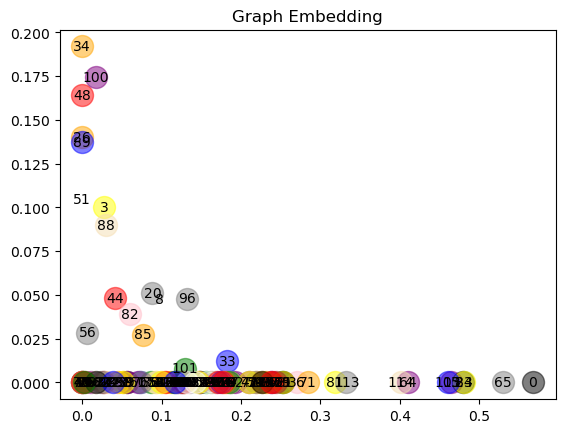

In [110]:
# 绘制 output，节点 GCN Embedding 可视化
def plot_node(output, title):
  for i in range(len(nodes)):
    node_name = nodes[i]
    value = G.nodes[node_name]['value']
    plt.scatter(np.array(output)[i,0],np.array(output)[i,1] ,label=str(i), color=getValue(value), alpha=0.5, s=250)
    plt.text(np.array(output)[i,0],np.array(output)[i,1] ,i, horizontalalignment='center',verticalalignment='center', fontdict={'color':'black'})
  plt.title(title)
  plt.show()

plot_node(output, 'Graph Embedding')

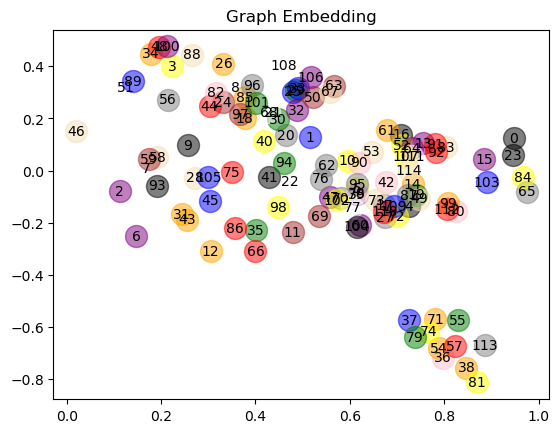

In [111]:
# 尝试去掉激活函数 relu, 重新运行一遍，效果可能会更好
def gcn_layer2(A_hat, D_hat, X, W):
  return D_hat**-1 * A_hat * X * W

H_3 = gcn_layer2(A_hat, D_hat, I, W_1)
H_4 = gcn_layer2(A_hat, D_hat, H_3, W_2)
output2 = H_4
plot_node(output2, 'Graph Embedding')